# COVID19DB PROJECT (www.covid19db.org): covid19 - Administrative division


This notebook demonstrates how to access Administrative division data.

# Administrative division, level 0 - List of countries

Data source for administratime division: https://gadm.org/


In [1]:
import psycopg2
import pandas as pd
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()
import matplotlib.pyplot as plt

# Connect to covid19db.org
conn = psycopg2.connect(
    host='covid19db.org',
    port=5432,
    dbname='covid19',
    user='covid19',
    password='covid19'
)

cur = conn.cursor()

In [2]:
import geopandas as gpd
def get_administrative_division(level=0, countrycode=None):
    sql = f"SELECT * FROM administrative_division WHERE adm_level={level} "
    if level>0 and countrycode: 
        sql = sql +  f"AND countrycode='{countrycode}'"

    admin_data = gpd.GeoDataFrame.from_postgis(sql, conn, geom_col='geometry')
    admin_data["area"] = admin_data['geometry'].area
    return admin_data

In [ ]:
cur = conn.cursor()
cur.execute(f"""SELECT * FROM administrative_division WHERE adm_level={level} """)
covid19_data = pd.DataFrame(cur.fetchall(), columns=[desc[0] for desc in cur.description])

In [3]:
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import geoplot as gplt

def choropleth_administrative_division(data, hue, add_text=False):
    schema = mc.Quantiles(data[hue], k=10)
    gplt.choropleth(
        data,     
        hue=hue,     
        edgecolor='white', 
        linewidth=1,
        cmap='Blues',
        scheme=schema,
        legend=True, 
        legend_kwargs={'bbox_to_anchor': (1, 0.9), 'frameon': False},
    )
    if add_text:
        for _, row in data.iterrows():
          plt.text(s=row['adm_area_1'], x = row['longitude'], y = row['latitude'],
                   horizontalalignment='center', 
                   fontdict = {'weight': 'bold', 'size': 10, 'family': 'serif', 'color':  'maroon',})
        
        
def plot_administrative_division(data, cmap='Blues', add_text=False):
    # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    fig, ax = plt.subplots(figsize = (10,6))
    data.reset_index().plot(column = 'region', cmap=cmap, ax=ax)
    ax.set_axis_off()
    plt.axis('equal');
    
    if add_text:
        for _, row in data.iterrows():
          c = row['geometry'].centroid
          plt.text(s=row.name, x = c.x, y = c.y,
                   horizontalalignment='center', 
                   fontdict = {'weight': 'bold', 'size': 10, 'family': 'serif', 'color':  'maroon',})

In [38]:
admin_0_data = get_administrative_division(level=0)

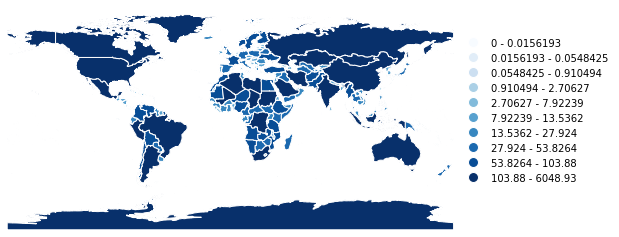

In [393]:
choropleth_administrative_division(admin_0_data, 'area', add_text=False)

# Administrative division, level 1

### Administrative division, level 1 - Poland

In [4]:
POL_admin_1_data = get_administrative_division(level=1, countrycode='POL')
POL_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,Poland,POL,PL,1,Dolnośląskie,POL.1_1,None,None,None,None,POL.1_1,50.996336,16.314654,"{'CC_1': '02', 'GID_0': 'POL', 'GID_1': 'POL.1...","MULTIPOLYGON (((14.82318 50.87067, 14.82343 50...",2.554070
1,Poland,POL,PL,1,Kujawsko-Pomorskie,POL.2_1,None,None,None,None,POL.2_1,53.064802,18.496439,"{'CC_1': '04', 'GID_0': 'POL', 'GID_1': 'POL.2...","POLYGON ((18.23998 52.48726, 18.23991 52.48722...",2.409414
2,Poland,POL,PL,1,Łódzkie,POL.3_1,None,None,None,None,POL.3_1,51.481945,19.461814,"{'CC_1': '10', 'GID_0': 'POL', 'GID_1': 'POL.3...","POLYGON ((19.81074 50.90792, 19.81061 50.90785...",2.363616
3,Poland,POL,PL,1,Lubelskie,POL.4_1,None,None,None,None,POL.4_1,51.126592,22.667700,"{'CC_1': '06', 'GID_0': 'POL', 'GID_1': 'POL.4...","MULTIPOLYGON (((22.65582 50.35567, 22.65579 50...",3.227996
4,Poland,POL,PL,1,Lubuskie,POL.5_1,None,None,None,None,POL.5_1,52.311706,15.585657,"{'CC_1': '08', 'GID_0': 'POL', 'GID_1': 'POL.5...","POLYGON ((15.12407 51.43452, 15.12360 51.43448...",1.838498


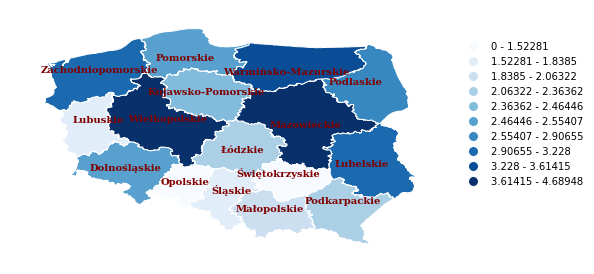

In [5]:
 choropleth_administrative_division(POL_admin_1_data, 'area', add_text=True)

### Administrative division, level 1 - USA

In [6]:
USA_admin_1_data = get_administrative_division(level=1, countrycode='USA')
USA_admin_1_data.head()
# Remove Alaska and Hawai
USA_admin_1_data.drop(USA_admin_1_data[USA_admin_1_data.adm_area_1.isin(['Hawaii', 'Alaska'])].index, inplace=True)
USA_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,United States,USA,US,1,Alabama,USA.1_1,None,None,None,None,USA.1_1,30.541373,-87.752847,"{'CC_1': '', 'GID_0': 'USA', 'GID_1': 'USA.1_1...","MULTIPOLYGON (((-87.97000 30.67667, -87.96972 ...",12.867000
2,United States,USA,US,1,Arizona,USA.3_1,None,None,None,None,USA.3_1,34.493827,-113.942884,"{'CC_1': '', 'GID_0': 'USA', 'GID_1': 'USA.3_1...","POLYGON ((-110.82376 31.33125, -110.82608 31.3...",28.931418
3,United States,USA,US,1,Arkansas,USA.4_1,None,None,None,None,USA.4_1,34.682620,-91.400520,"{'CC_1': '', 'GID_0': 'USA', 'GID_1': 'USA.4_1...","POLYGON ((-92.72461 33.01474, -92.86195 33.016...",13.581244
4,United States,USA,US,1,California,USA.5_1,None,None,None,None,USA.5_1,35.805454,-120.595474,"{'CC_1': '', 'GID_0': 'USA', 'GID_1': 'USA.5_1...","MULTIPOLYGON (((-118.58976 33.03865, -118.5897...",41.641025
5,United States,USA,US,1,District of Columbia,USA.9_1,None,None,None,None,USA.9_1,38.852248,-77.029233,"{'CC_1': '', 'GID_0': 'USA', 'GID_1': 'USA.9_1...","POLYGON ((-77.00851 38.96956, -76.98849 38.954...",0.017246


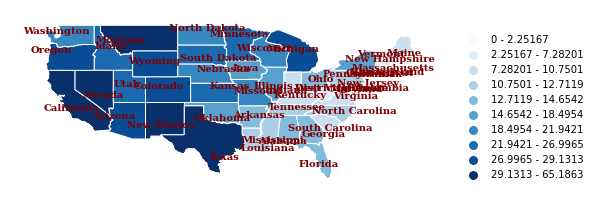

In [7]:
choropleth_administrative_division(USA_admin_1_data, 'area', add_text=True)

### Administrative division, level 2 - USA

In [35]:
USA_admin_2_data = get_administrative_division(level=2, countrycode='USA')
USA_admin_2_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,United States,USA,US,2,Minnesota,USA.24_1,Waseca,USA.24.82_1,None,None,USA.24.82_1,44.039964,-93.632033,"{'CC_2': '', 'GID_0': 'USA', 'GID_1': 'USA.24_...","POLYGON ((-93.76798 44.19714, -93.52509 44.198...",0.126296
1,United States,USA,US,2,Indiana,USA.15_1,Benton,USA.15.4_1,None,None,USA.15.4_1,40.593393,-87.353658,"{'CC_2': '', 'GID_0': 'USA', 'GID_1': 'USA.15_...","POLYGON ((-87.52606 40.49106, -87.52537 40.550...",0.111735
2,United States,USA,US,2,Indiana,USA.15_1,Blackford,USA.15.5_1,None,None,USA.15.5_1,40.461506,-85.292321,"{'CC_2': '', 'GID_0': 'USA', 'GID_1': 'USA.15_...","POLYGON ((-85.22054 40.37900, -85.44505 40.379...",0.045377
3,United States,USA,US,2,Indiana,USA.15_1,Boone,USA.15.6_1,None,None,USA.15.6_1,40.010964,-86.421701,"{'CC_2': '', 'GID_0': 'USA', 'GID_1': 'USA.15_...","POLYGON ((-86.32669 39.92376, -86.69369 39.922...",0.116201
4,United States,USA,US,2,Iowa,USA.16_1,Humboldt,USA.16.46_1,None,None,USA.16.46_1,42.783855,-94.193611,"{'CC_2': '', 'GID_0': 'USA', 'GID_1': 'USA.16_...","POLYGON ((-93.97131 42.90664, -93.97134 42.818...",0.124917


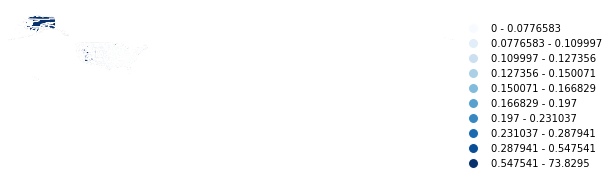

In [37]:
choropleth_administrative_division(USA_admin_2_data, 'area', add_text=True)

### Administrative division, level 1 - UK

In [11]:
GBR_admin_1_data = get_administrative_division(level=1, countrycode='GBR')
GBR_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,United Kingdom,GBR,GB,1,England,GBR.1_1,None,None,None,None,GBR.1_1,51.935570,-2.002003,"{'CC_1': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","MULTIPOLYGON (((-6.38792 49.86875, -6.38792 49...",17.356487
1,United Kingdom,GBR,GB,1,Northern Ireland,GBR.2_1,None,None,None,None,GBR.2_1,54.654272,-5.916506,"{'CC_1': '', 'GID_0': 'GBR', 'GID_1': 'GBR.2_1...","MULTIPOLYGON (((-6.09417 54.05153, -6.09417 54...",1.958360
2,United Kingdom,GBR,GB,1,Scotland,GBR.3_1,None,None,None,None,GBR.3_1,57.290093,-5.167482,"{'CC_1': '', 'GID_0': 'GBR', 'GID_1': 'GBR.3_1...","MULTIPOLYGON (((-3.80361 54.86208, -3.80361 54...",11.724743
3,United Kingdom,GBR,GB,1,Wales,GBR.4_1,None,None,None,None,GBR.4_1,52.362980,-4.346716,"{'CC_1': '', 'GID_0': 'GBR', 'GID_1': 'GBR.4_1...","MULTIPOLYGON (((-3.10472 51.34153, -3.10472 51...",2.755293


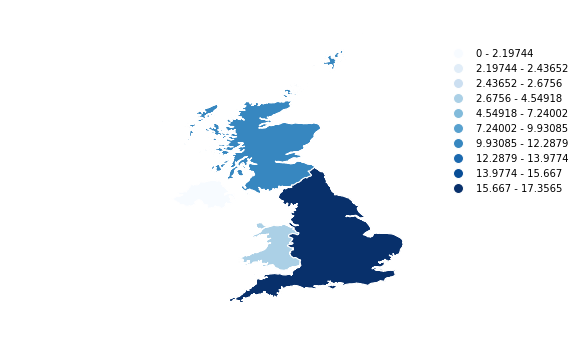

In [12]:
choropleth_administrative_division(GBR_admin_1_data, 'area', add_text=False)

### Administrative division, level 2 - UK

In [13]:
GBR_admin_2_data = get_administrative_division(level=2, countrycode='GBR')
GBR_admin_2_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,United Kingdom,GBR,GB,2,England,GBR.1_1,Barnsley,GBR.1.1_1,None,None,GBR.1.1_1,53.513154,-1.535194,"{'CC_2': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","POLYGON ((-1.78997 53.47293, -1.79306 53.47778...",0.047535
1,United Kingdom,GBR,GB,2,England,GBR.1_1,Bath and North East Somerset,GBR.1.2_1,None,None,GBR.1.2_1,51.364995,-2.510937,"{'CC_2': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","POLYGON ((-2.68629 51.31516, -2.68066 51.32836...",0.045692
2,United Kingdom,GBR,GB,2,England,GBR.1_1,Bedfordshire,GBR.1.3_1,None,None,GBR.1.3_1,52.202312,-0.479904,"{'CC_2': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","POLYGON ((-0.58508 52.11364, -0.58806 52.11805...",0.050317
3,United Kingdom,GBR,GB,2,England,GBR.1_1,Birmingham,GBR.1.4_1,None,None,GBR.1.4_1,52.485488,-1.867177,"{'CC_2': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","POLYGON ((-1.73417 52.51014, -1.73984 52.50894...",0.034839
4,United Kingdom,GBR,GB,2,England,GBR.1_1,Blackburn with Darwen,GBR.1.5_1,None,None,GBR.1.5_1,53.693067,-2.476420,"{'CC_2': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","POLYGON ((-2.51111 53.63377, -2.51317 53.63582...",0.018634


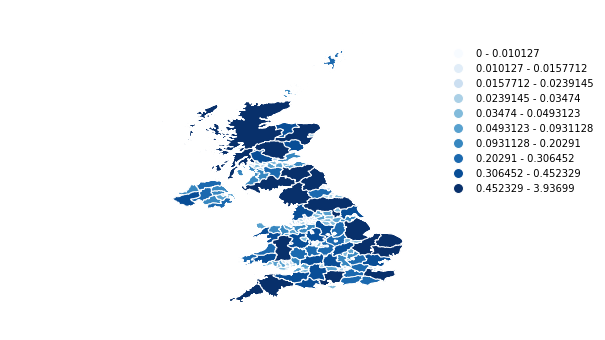

In [15]:
choropleth_administrative_division(GBR_admin_2_data, 'area', add_text=False)

### Administrative division, level 3 - UK

In [18]:
GBR_admin_3_data = get_administrative_division(level=3, countrycode='GBR')
GBR_admin_3_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,United Kingdom,GBR,GB,3,England,GBR.1_1,Barnsley,GBR.1.1_1,Barnsley,GBR.1.1.1_1,GBR.1.1.1_1,53.513154,-1.535194,"{'CC_3': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","POLYGON ((-1.78997 53.47293, -1.79306 53.47778...",0.047535
1,United Kingdom,GBR,GB,3,England,GBR.1_1,Bath and North East Somerset,GBR.1.2_1,Bath and North East Somerset,GBR.1.2.1_1,GBR.1.2.1_1,51.364995,-2.510937,"{'CC_3': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","POLYGON ((-2.68629 51.31516, -2.68066 51.32836...",0.045692
2,United Kingdom,GBR,GB,3,England,GBR.1_1,Bedfordshire,GBR.1.3_1,Bedford,GBR.1.3.1_1,GBR.1.3.1_1,52.202312,-0.479904,"{'CC_3': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","POLYGON ((-0.58508 52.11364, -0.58806 52.11805...",0.050317
3,United Kingdom,GBR,GB,3,England,GBR.1_1,Birmingham,GBR.1.4_1,Birmingham,GBR.1.4.1_1,GBR.1.4.1_1,52.485488,-1.867177,"{'CC_3': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","POLYGON ((-1.73417 52.51014, -1.73984 52.50894...",0.034839
4,United Kingdom,GBR,GB,3,England,GBR.1_1,Blackburn with Darwen,GBR.1.5_1,Blackburn with Darwen,GBR.1.5.1_1,GBR.1.5.1_1,53.693067,-2.476420,"{'CC_3': '', 'GID_0': 'GBR', 'GID_1': 'GBR.1_1...","POLYGON ((-2.51111 53.63377, -2.51317 53.63582...",0.018634


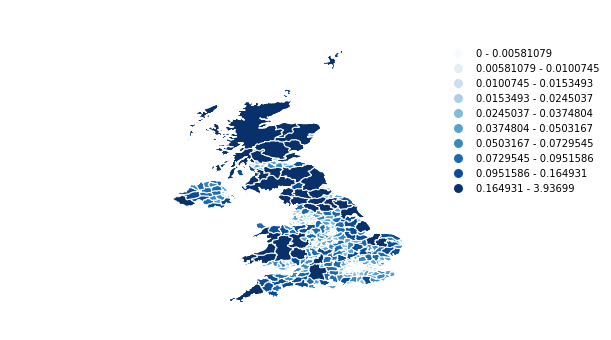

In [19]:
choropleth_administrative_division(GBR_admin_3_data, 'area', add_text=False)

### Administrative division, level 1 - Italy

In [21]:
ITA_admin_1_data = get_administrative_division(level=1, countrycode='ITA')
ITA_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,Italy,ITA,IT,1,Abruzzo,ITA.1_1,None,None,None,None,ITA.1_1,42.334512,14.190378,"{'CC_1': '13', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","POLYGON ((14.53183 41.80166, 14.53246 41.80097...",1.175980
1,Italy,ITA,IT,1,Apulia,ITA.2_1,None,None,None,None,ITA.2_1,40.844419,17.106231,"{'CC_1': '16', 'GID_0': 'ITA', 'GID_1': 'ITA.2...","MULTIPOLYGON (((17.94931 40.05375, 17.94931 40...",2.067723
2,Italy,ITA,IT,1,Basilicata,ITA.3_1,None,None,None,None,ITA.3_1,40.319949,16.231448,"{'CC_1': '17', 'GID_0': 'ITA', 'GID_1': 'ITA.3...","MULTIPOLYGON (((15.71736 39.96792, 15.71736 39...",1.061184
3,Italy,ITA,IT,1,Calabria,ITA.4_1,None,None,None,None,ITA.4_1,38.930156,16.324239,"{'CC_1': '18', 'GID_0': 'ITA', 'GID_1': 'ITA.4...","MULTIPOLYGON (((15.80208 39.70014, 15.80208 39...",1.569197
4,Italy,ITA,IT,1,Campania,ITA.5_1,None,None,None,None,ITA.5_1,40.634545,14.585906,"{'CC_1': '15', 'GID_0': 'ITA', 'GID_1': 'ITA.5...","MULTIPOLYGON (((13.93197 40.74681, 13.93514 40...",1.456194


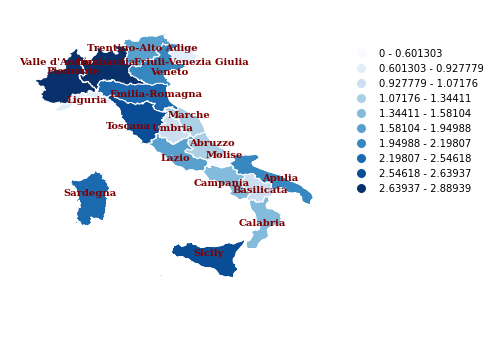

In [26]:
choropleth_administrative_division(ITA_admin_1_data, 'area', add_text=True)

### Administrative division, level 2 - Italy

In [24]:
ITA_admin_2_data = get_administrative_division(level=2, countrycode='ITA')
ITA_admin_2_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,Italy,ITA,IT,2,Sardegna,ITA.14_1,Medio Campidano,ITA.14.3_1,None,None,ITA.14.3_1,39.617175,8.533166,"{'CC_2': '92', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","POLYGON ((8.97925 39.42309, 8.97025 39.41691, ...",0.159425
1,Italy,ITA,IT,2,Sardegna,ITA.14_1,Nuoro,ITA.14.4_1,None,None,ITA.14.4_1,40.449023,9.534271,"{'CC_2': '91', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","MULTIPOLYGON (((9.81931 40.53903, 9.81931 40.5...",0.512457
2,Italy,ITA,IT,2,Sardegna,ITA.14_1,Ogliastra,ITA.14.5_1,None,None,ITA.14.5_1,39.901363,9.638751,"{'CC_2': '91', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","MULTIPOLYGON (((9.70347 39.97542, 9.70347 39.9...",0.205548
3,Italy,ITA,IT,2,Sardegna,ITA.14_1,Olbia-Tempio,ITA.14.6_1,None,None,ITA.14.6_1,41.084075,9.404207,"{'CC_2': '90', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","MULTIPOLYGON (((9.77875 40.87514, 9.77875 40.8...",0.346519
4,Italy,ITA,IT,2,Sardegna,ITA.14_1,Oristano,ITA.14.7_1,None,None,ITA.14.7_1,39.993291,8.506807,"{'CC_2': '95', 'GID_0': 'ITA', 'GID_1': 'ITA.1...","MULTIPOLYGON (((8.50653 39.70663, 8.50653 39.7...",0.299580


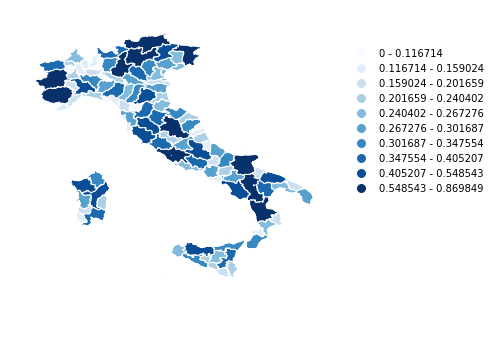

In [27]:
choropleth_administrative_division(ITA_admin_2_data, 'area', add_text=False)

### Administrative division, level 1 - France

In [30]:
FRA_admin_1_data = get_administrative_division(level=1, countrycode='FRA')
FRA_admin_1_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,France,FRA,FR,1,Auvergne-Rhône-Alpes,FRA.1_1,None,None,None,None,FRA.1_1,45.713621,5.207967,"{'CC_1': '', 'GID_0': 'FRA', 'GID_1': 'FRA.1_1...","POLYGON ((2.22057 44.62204, 2.20748 44.61553, ...",8.200923
1,France,FRA,FR,1,Bourgogne-Franche-Comté,FRA.2_1,None,None,None,None,FRA.2_1,47.264160,4.919687,"{'CC_1': '', 'GID_0': 'FRA', 'GID_1': 'FRA.2_1...","POLYGON ((5.89463 46.28661, 5.88075 46.27185, ...",5.708754
2,France,FRA,FR,1,Bretagne,FRA.3_1,None,None,None,None,FRA.3_1,48.188796,-3.521491,"{'CC_1': '', 'GID_0': 'FRA', 'GID_1': 'FRA.3_1...","MULTIPOLYGON (((-2.83514 47.32681, -2.83514 47...",3.341697
3,France,FRA,FR,1,Centre-Val de Loire,FRA.4_1,None,None,None,None,FRA.4_1,47.615612,1.611397,"{'CC_1': '', 'GID_0': 'FRA', 'GID_1': 'FRA.4_1...","POLYGON ((1.12372 46.52232, 1.10414 46.53343, ...",4.718132
4,France,FRA,FR,1,Corse,FRA.5_1,None,None,None,None,FRA.5_1,42.095084,9.030954,"{'CC_1': '', 'GID_0': 'FRA', 'GID_1': 'FRA.5_1...","MULTIPOLYGON (((9.25764 41.34903, 9.25764 41.3...",0.952350


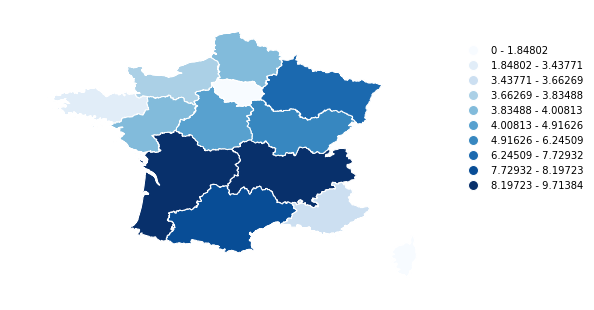

In [31]:
choropleth_administrative_division(FRA_admin_1_data, 'area', add_text=False)

### Administrative division, level 2 - France

In [32]:
FRA_admin_2_data = get_administrative_division(level=2, countrycode='FRA')
FRA_admin_2_data.head()

,country,countrycode,countrycode_alpha2,adm_level,adm_area_1,adm_area_1_code,adm_area_2,adm_area_2_code,adm_area_3,adm_area_3_code,gid,latitude,longitude,properties,geometry,area
0,France,FRA,FR,2,Auvergne-Rhône-Alpes,FRA.1_1,Ain,FRA.1.1_1,None,None,FRA.1.1_1,46.113415,5.455322,"{'CC_2': '01', 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((5.25563 45.78431, 5.24020 45.77737, ...",0.673131
1,France,FRA,FR,2,Auvergne-Rhône-Alpes,FRA.1_1,Allier,FRA.1.2_1,None,None,FRA.1.2_1,46.385202,3.187769,"{'CC_2': '03', 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((2.38608 46.33197, 2.37061 46.31272, ...",0.863224
2,France,FRA,FR,2,Auvergne-Rhône-Alpes,FRA.1_1,Ardèche,FRA.1.3_1,None,None,FRA.1.3_1,44.789845,4.429379,"{'CC_2': '07', 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((4.23405 44.27506, 4.21638 44.28904, ...",0.632390
3,France,FRA,FR,2,Auvergne-Rhône-Alpes,FRA.1_1,Cantal,FRA.1.4_1,None,None,FRA.1.4_1,45.036841,2.728522,"{'CC_2': '15', 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((2.85493 44.87431, 2.85140 44.87195, ...",0.659791
4,France,FRA,FR,2,Auvergne-Rhône-Alpes,FRA.1_1,Drôme,FRA.1.5_1,None,None,FRA.1.5_1,44.652014,5.213081,"{'CC_2': '26', 'GID_0': 'FRA', 'GID_1': 'FRA.1...","POLYGON ((4.81214 44.24206, 4.81251 44.25802, ...",0.744574


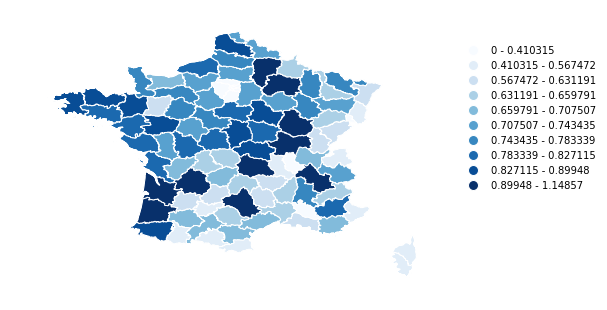

In [33]:
choropleth_administrative_division(FRA_admin_2_data, 'area', add_text=False)